In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Processing and EDA

In [ ]:
data_dir = "/content/drive/MyDrive/School/AMATH584/repos/amath584/hw6/data/mnist.npz"
(x_train, y_train), (x_test, y_test) = load_data(path=data_dir)

In [ ]:
print(f"training set dimensions: {x_train.shape}")
print(f"test set dimensions: {x_test.shape}")

training set dimensions: (60000, 28, 28)
test set dimensions: (10000, 28, 28)


In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# one-hot encode
y_train_encode = to_categorical(y_train, 10)
y_test_encode = to_categorical(y_test, 10)

Plot the first 10 numbers in training set

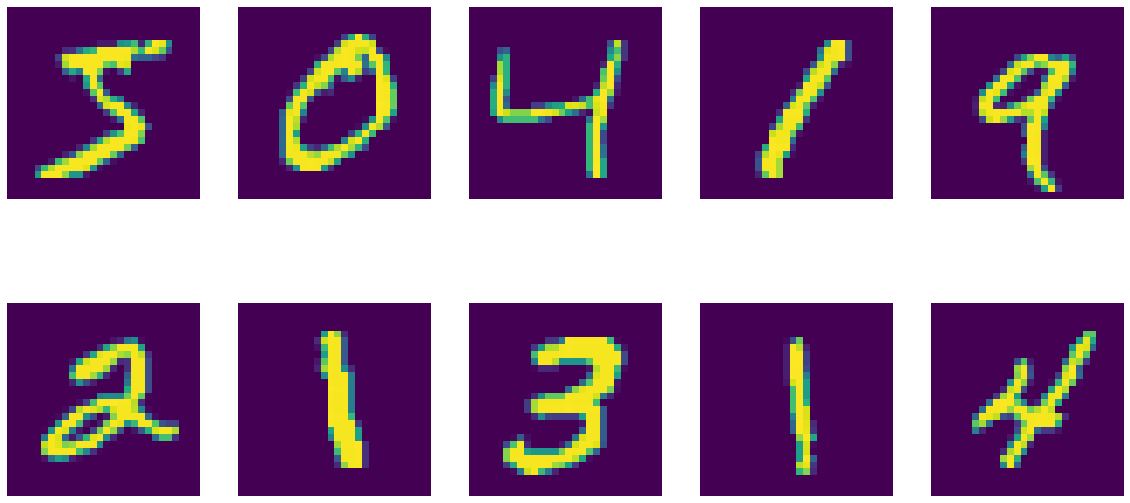

In [ ]:
fig=plt.figure(figsize=(20,10))

rows = 2
columns = 5

for i in range(10):
  ax = fig.add_subplot(rows, columns, i+1)
  plt.imshow(x_train[i].reshape(28,28))
  plt.axis('off')

In [ ]:
x_train.max()

255

In [ ]:
# normalize
x_train = x_train/255
x_test = x_test/255

In [ ]:
np.histogram(y_test, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

(array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028, 1983]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

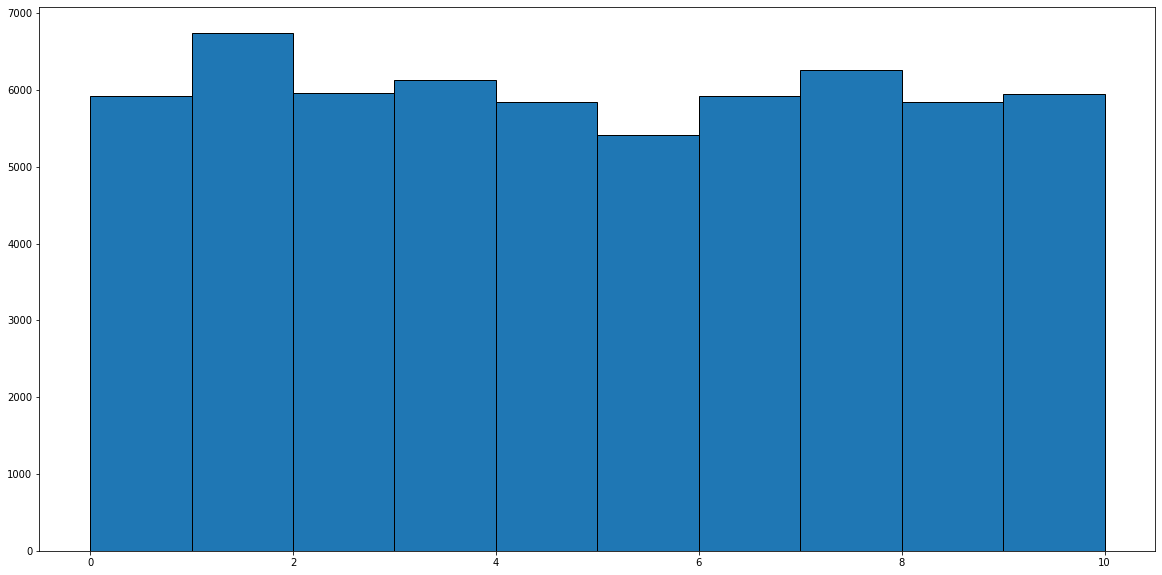

In [ ]:
fig=plt.figure(figsize=(20,10))

plt.hist(y_train, bins=[0,1,2,3,4,5,6,7,8,9, 10], ec='black')

(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

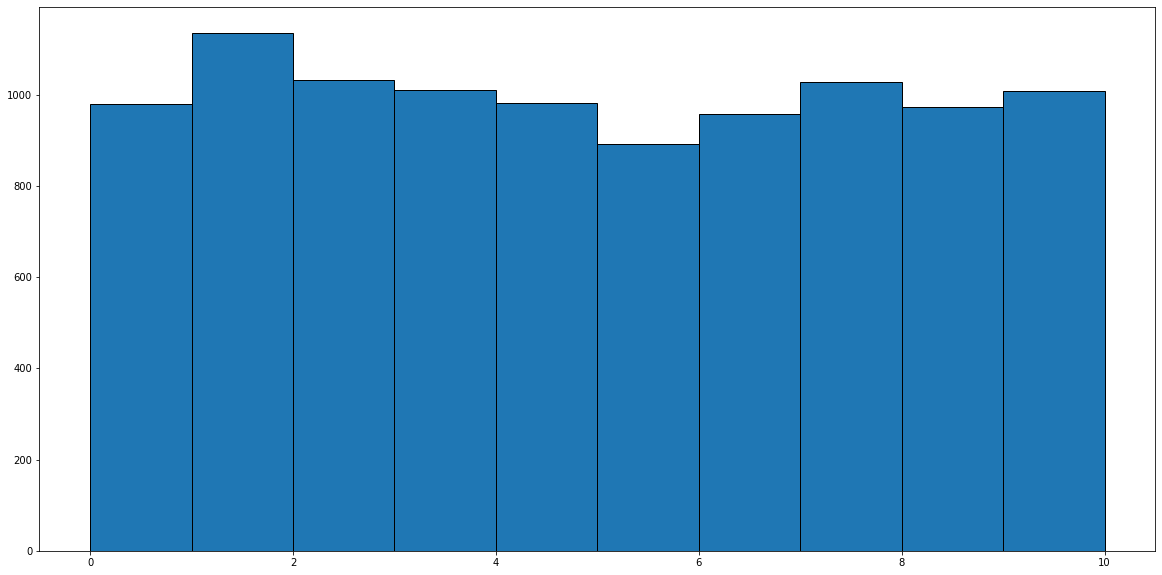

In [ ]:
fig=plt.figure(figsize=(20,10))

plt.hist(y_test, bins=[0,1,2,3,4,5,6,7,8,9,10], ec='black')

# Logistic Regression with LASSO, Ridge, and Elastic Net

## Hyperparameter Tuning
We use Grid Search to tune the type of regularization (L1 norm or Elastic Net) and size of the penalty.

In [ ]:
lr = LogisticRegression(tol=0.1)

param_grid = [
  {'C': [10**x for x in range(-5,5)], 'penalty': ['l1'], 'solver': ['saga']},
  {'C': [10**x for x in range(-5,5)], 'l1_ratio':[0.1*(x+1) for x in range(9)], 'penalty': ['elasticnet'], 'solver': ['saga']},
  ]

clf = GridSearchCV(lr, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

In [ ]:
clf.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.1, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                1000, 10000],
                          'penalty': ['l1'], 'solver': ['saga']},
                         {'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                1000, 10000],
                          'l1_ratio': [0.1, 0

In [ ]:
# import pickle
# filename = "/content/drive/MyDrive/School/AMATH584/repos/amath584/hw6/lr_norm_model.sav"
# pickle.dump(clf, open(filename, 'wb'))

# clf = pickle.load(open(filename, 'rb'))

### LASSO

In [ ]:
lasso_accuracy = clf.cv_results_['mean_test_score'][0:10]

In [ ]:
lasso_accuracy

array([0.11236667, 0.11236667, 0.63913333, 0.87518333, 0.9125    ,
       0.91871667, 0.91908333, 0.9195    , 0.9192    , 0.91938333])

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 11 Text major ticklabel objects>)

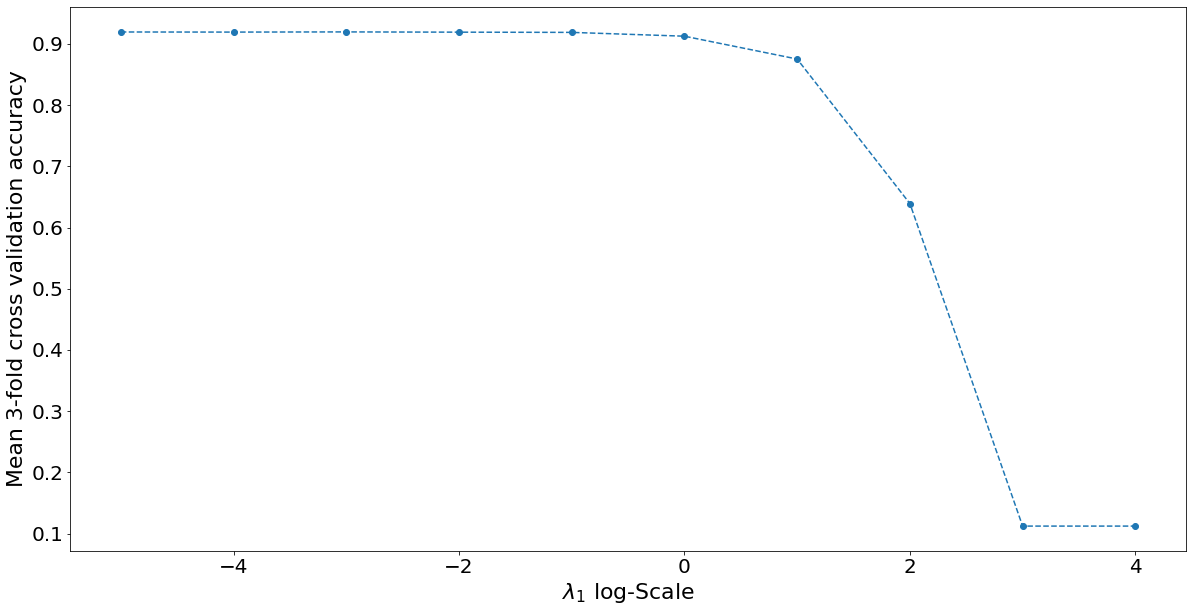

In [ ]:
plt.figure(figsize=(20,10))
#flip because the hyperparameter in scikit learn C = 1/lambda
plt.plot(list(range(-5,5)), np.flip(lasso_accuracy), '--o')  
plt.xlabel(r"$\lambda_1$ log-Scale",fontsize=22)
plt.ylabel("Mean 3-fold cross validation accuracy",fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [ ]:
lasso_best_params = clf.cv_results_['params'][np.argmax(lasso_accuracy)]
clf_lasso = LogisticRegression(**lasso_best_params)

clf_lasso.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lasso_best_params

{'C': 100, 'penalty': 'l1', 'solver': 'saga'}

18.62 % of features are zero!


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

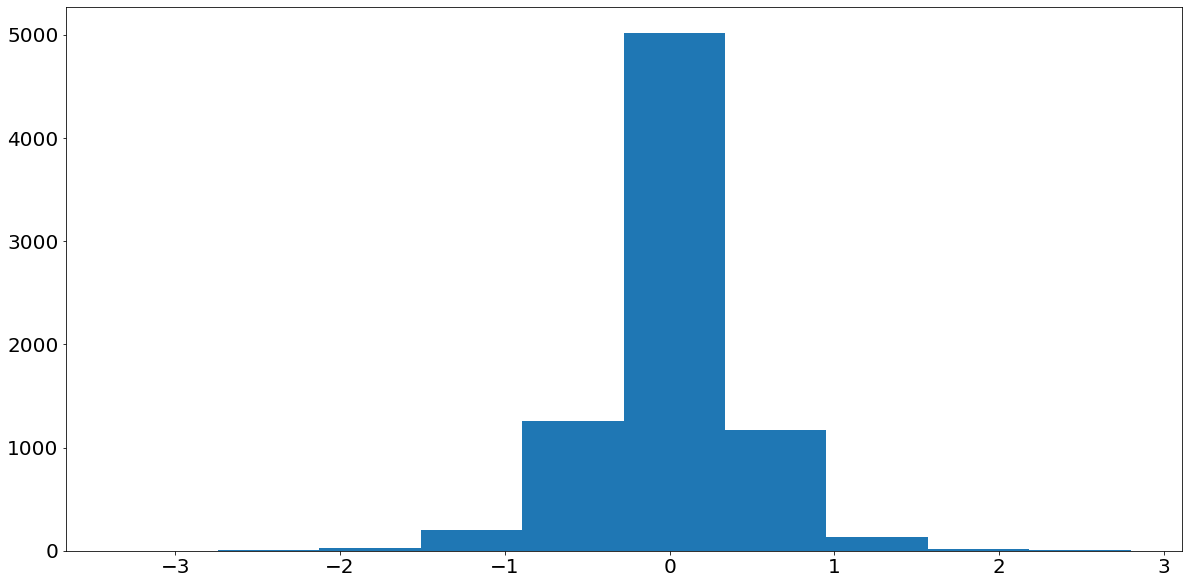

In [ ]:
lasso_coefs = clf_lasso.coef_

print(f"{np.mean(lasso_coefs == 0) * 100:.2f} % of features are zero!")

plt.figure(figsize=(20,10))
plt.hist(lasso_coefs.flatten())

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

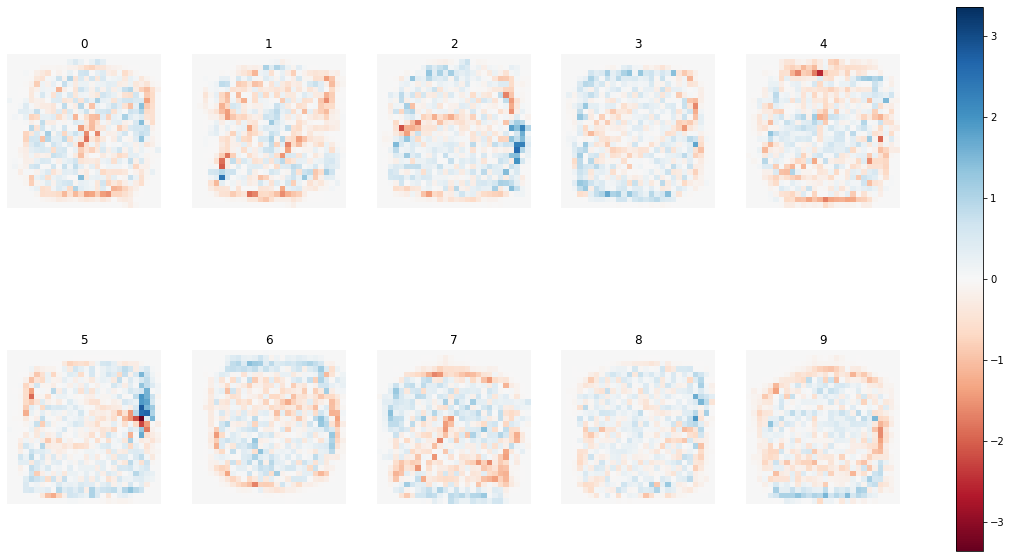

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

scale = np.abs(lasso_coefs).max()

for i, ax in enumerate(axes.flat):
  ax.set_axis_off()
  ax.set_title(f"{i}")
  img = lasso_coefs[i]
  img = img.reshape(28,28)
  im = ax.imshow(img, interpolation='nearest', vmin=-scale, vmax=scale, cmap=plt.cm.RdBu)

cbar = fig.colorbar(im, ax=axes.ravel().tolist())

### Elastic Net

In [ ]:
elastic_net_accuracy = clf.cv_results_['mean_test_score'][10:101]
elastic_net_params = clf.cv_results_['params'][10:101]

# rows represent same C, columns are for same l1_ratio
elastic_net_accuracy = elastic_net_accuracy.reshape(9,10)
#flip because the hyperparameter in scikit learn C = 1/lambda
elastic_net_accuracy = np.flip(elastic_net_accuracy, axis=1)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 11 Text major ticklabel objects>)

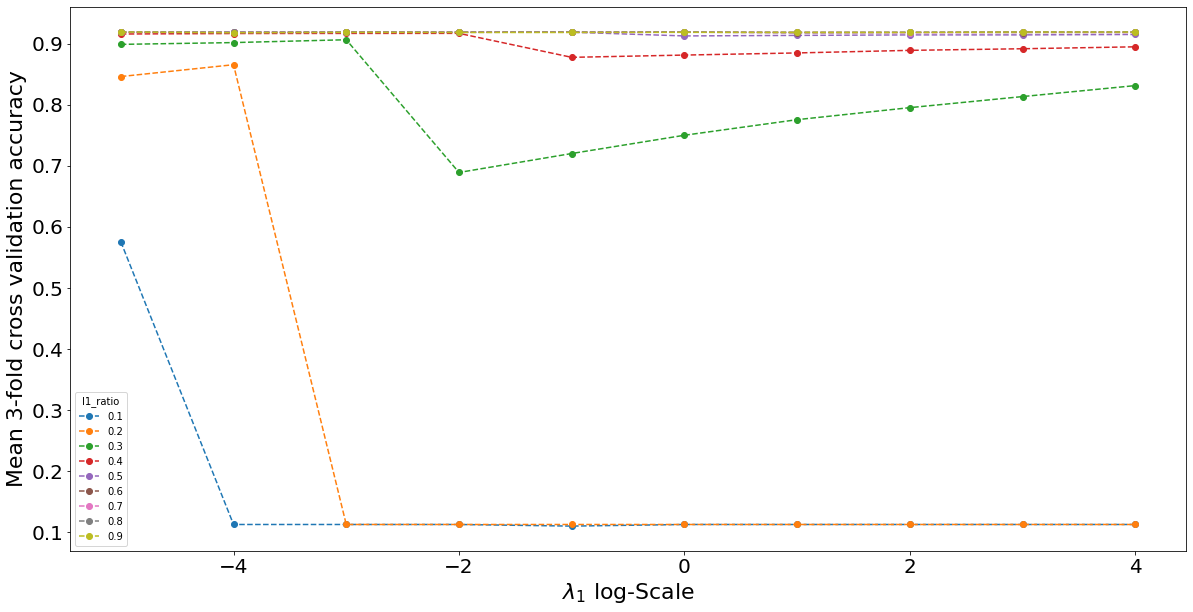

In [ ]:
plt.figure(figsize=(20,10))
#flip because the hyperparameter in scikit learn C = 1/lambda
plt.plot(list(range(-5,5)), elastic_net_accuracy.T, '--o')  
plt.xlabel(r"$\lambda_1$ log-Scale", fontsize=22)
plt.ylabel("Mean 3-fold cross validation accuracy", fontsize=22)

plt.legend([round(0.1*(x+1),1) for x in range(9)], title="l1_ratio")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [ ]:
clf.best_params_

{'C': 100, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}

In [ ]:
coefs = clf.best_estimator_.coef_

In [ ]:
print(f"{np.mean(coefs == 0) * 100:.2f} % of features are zero!")

15.22 % of features are zero!


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

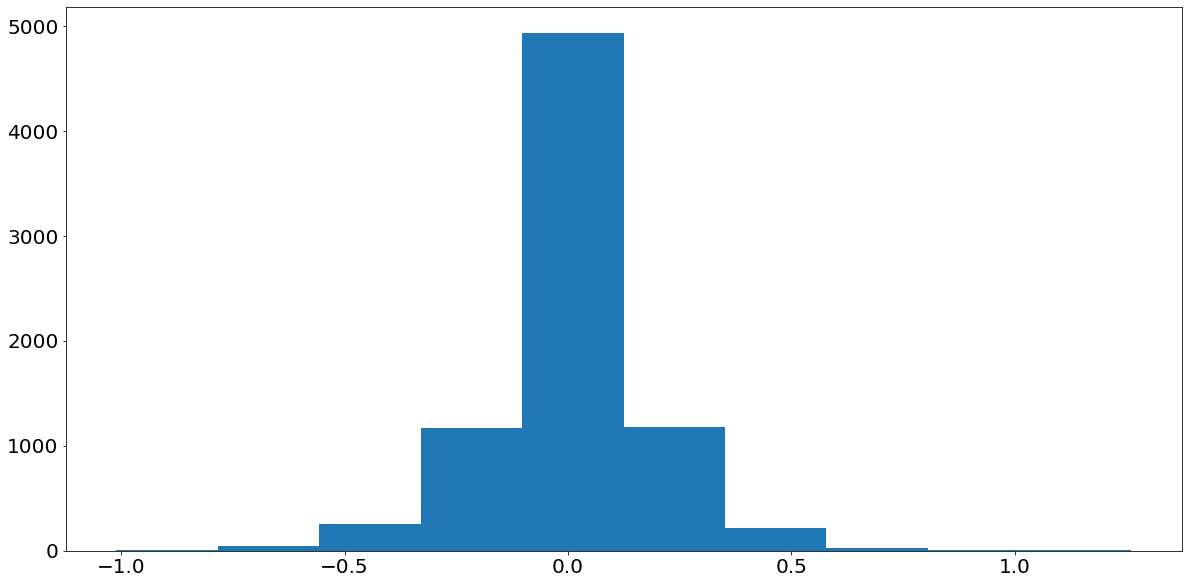

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(coefs.flatten())

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

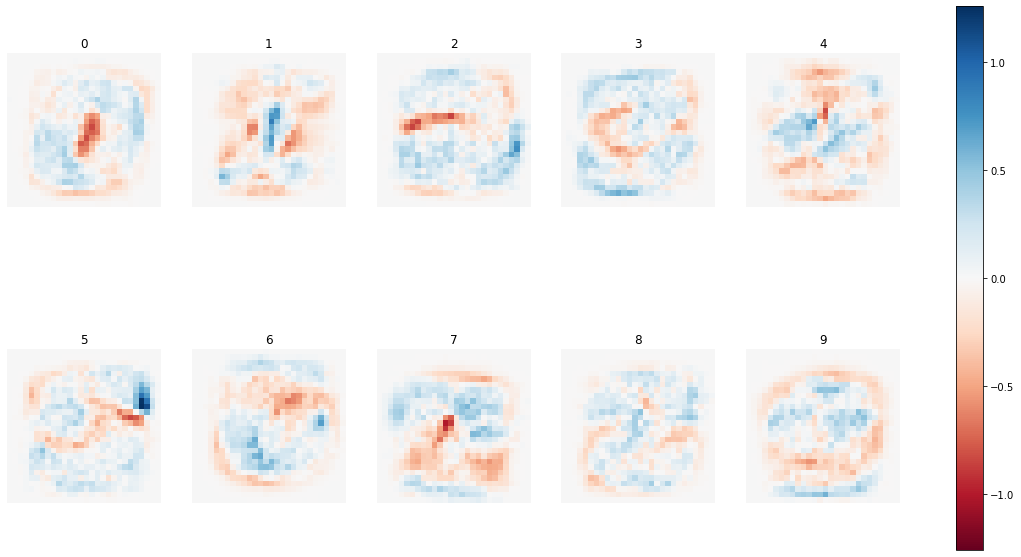

In [ ]:

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

scale = np.abs(coefs).max()

for i, ax in enumerate(axes.flat):
  ax.set_axis_off()
  ax.set_title(f"{i}")
  img = coefs[i]
  img = img.reshape(28,28)
  im = ax.imshow(img, interpolation='nearest', vmin=-scale, vmax=scale, cmap=plt.cm.RdBu)

cbar = fig.colorbar(im, ax=axes.ravel().tolist())

### Ridge
For comparison, we also fit a logistic regression model with $\ell_2$-norm regularization.

In [ ]:
lr = LogisticRegression(tol=0.1)

param_grid = [
  {'C': [10**x for x in range(-5,5)], 'penalty': ['l2'], 'solver': ['saga']},
  ]

clf_ridge = GridSearchCV(lr, param_grid, cv=3, scoring='accuracy', n_jobs=2)

clf_ridge.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.1, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                1000, 10000],
                          'penalty': ['l2'], 'solver': ['saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
clf_ridge.best_params_

{'C': 10000, 'penalty': 'l2', 'solver': 'saga'}

In [74]:
print(f"LASSO: {lasso_accuracy.max() * 100}")
print(f"Ridge: {clf_ridge.best_score_ * 100}")
print(f"Elastic Net: {clf.best_score_ * 100}")

LASSO: 91.94999999999999
Ridge: 91.945
Elastic Net: 91.97833333333332


(array([0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 <a list of 7 Text major ticklabel objects>)

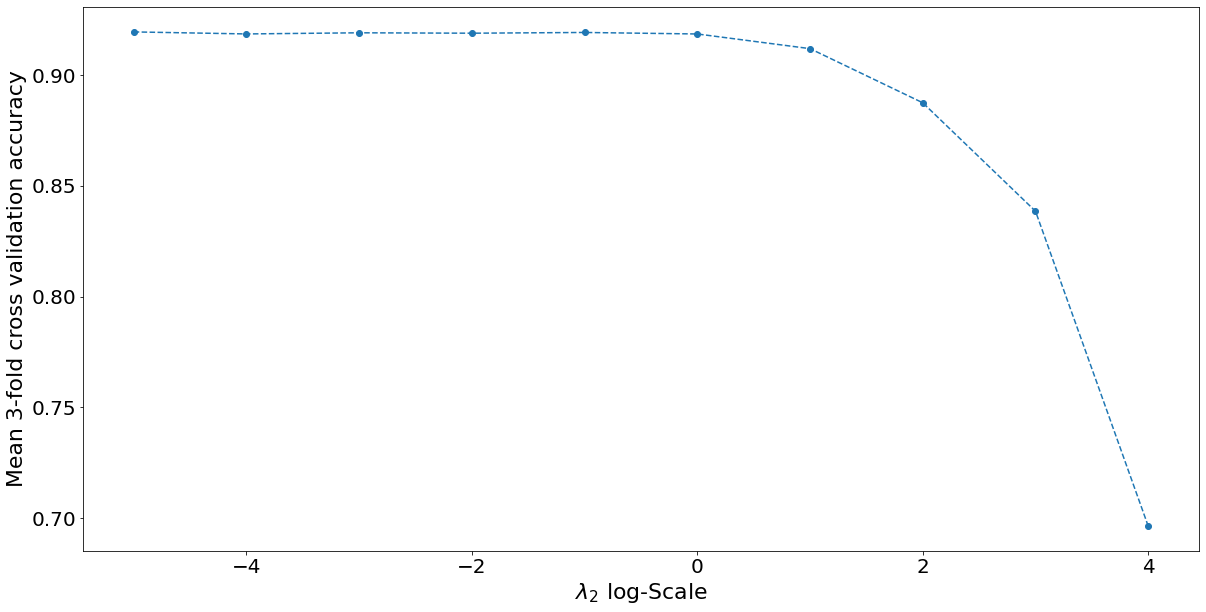

In [ ]:
ridge_accuracy = clf_ridge.cv_results_['mean_test_score']

plt.figure(figsize=(20,10))
#flip because the hyperparameter in scikit learn C = 1/lambda
plt.plot(list(range(-5,5)), np.flip(ridge_accuracy), '--o')  
plt.xlabel(r"$\lambda_2$ log-Scale",fontsize=22)
plt.ylabel("Mean 3-fold cross validation accuracy",fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

8.55 % of features are zero!


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

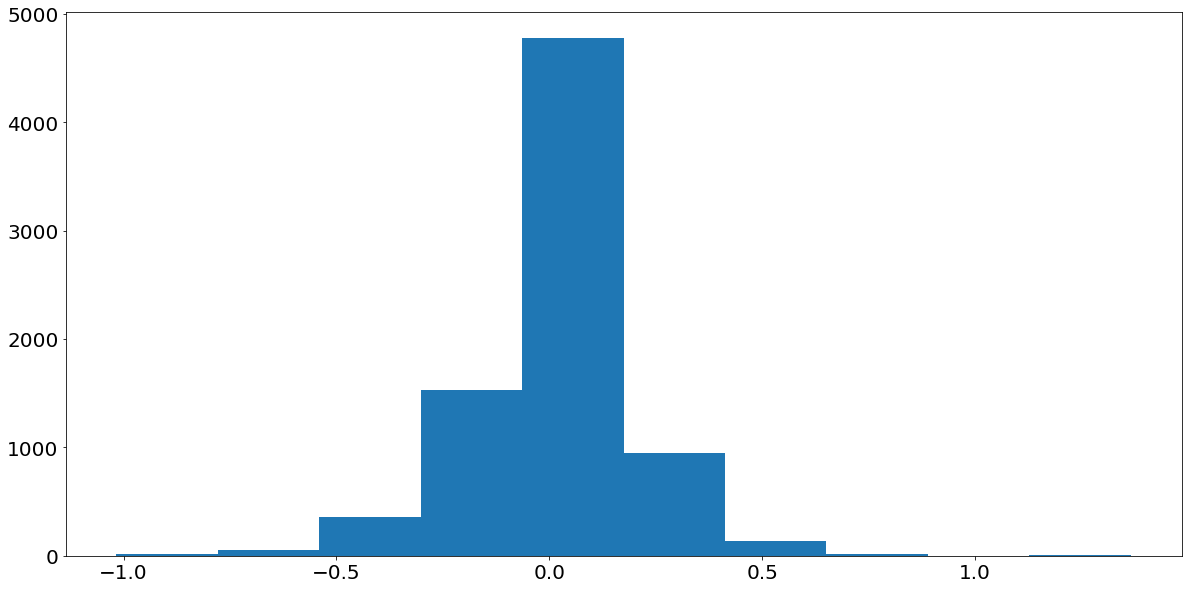

In [69]:
ridge_coefs = clf_ridge.best_estimator_.coef_

print(f"{np.mean(ridge_coefs == 0) * 100:.2f} % of features are zero!")

plt.figure(figsize=(20,10))
plt.hist(ridge_coefs.flatten())

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

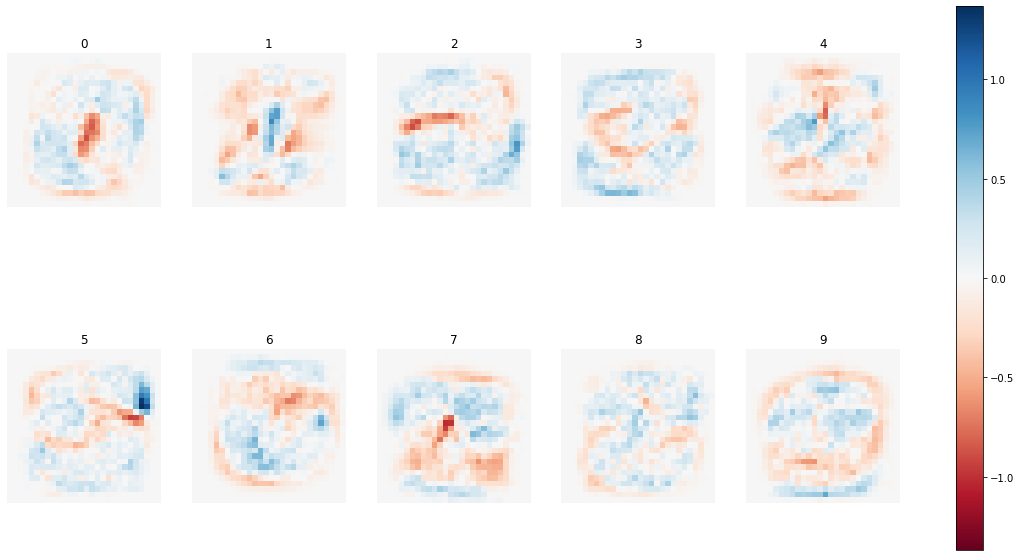

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

scale = np.abs(ridge_coefs).max()

for i, ax in enumerate(axes.flat):
  ax.set_axis_off()
  ax.set_title(f"{i}")
  img = ridge_coefs[i]
  img = img.reshape(28,28)
  im = ax.imshow(img, interpolation='nearest', vmin=-scale, vmax=scale, cmap=plt.cm.RdBu)

cbar = fig.colorbar(im, ax=axes.ravel().tolist())

# Ranking Pixels
We rank the pixels by each its corresponding coefficient for each digit.

### LASSO

In [ ]:
# most important pixels for each digit
lasso_coefs.argmax(axis=1)

array([629, 621, 501, 472, 249, 304,  66, 310, 360, 742])

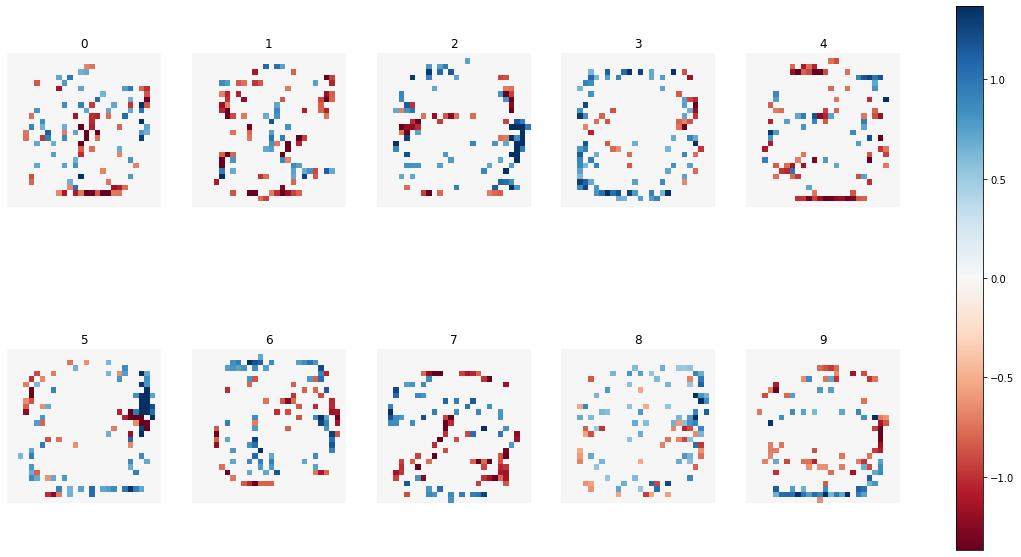

In [ ]:
n = 100

lasso_coefs_copy = lasso_coefs.copy()

arr = np.empty((0,784), float)
for row in lasso_coefs_copy:
  abs_row = abs(row)
  abs_row.sort()
  thresh = abs_row[-n]
  filter = abs(row) < thresh
  row[filter] = 0
  arr = np.append(arr, np.array([row]), axis=0)


fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

scale = np.abs(ridge_coefs).max()

for i, ax in enumerate(axes.flat):
  ax.set_axis_off()
  ax.set_title(f"{i}")
  img = arr[i]
  img = img.reshape(28,28)
  im = ax.imshow(img, interpolation='nearest', vmin=-scale, vmax=scale, cmap=plt.cm.RdBu)

cbar = fig.colorbar(im, ax=axes.ravel().tolist())

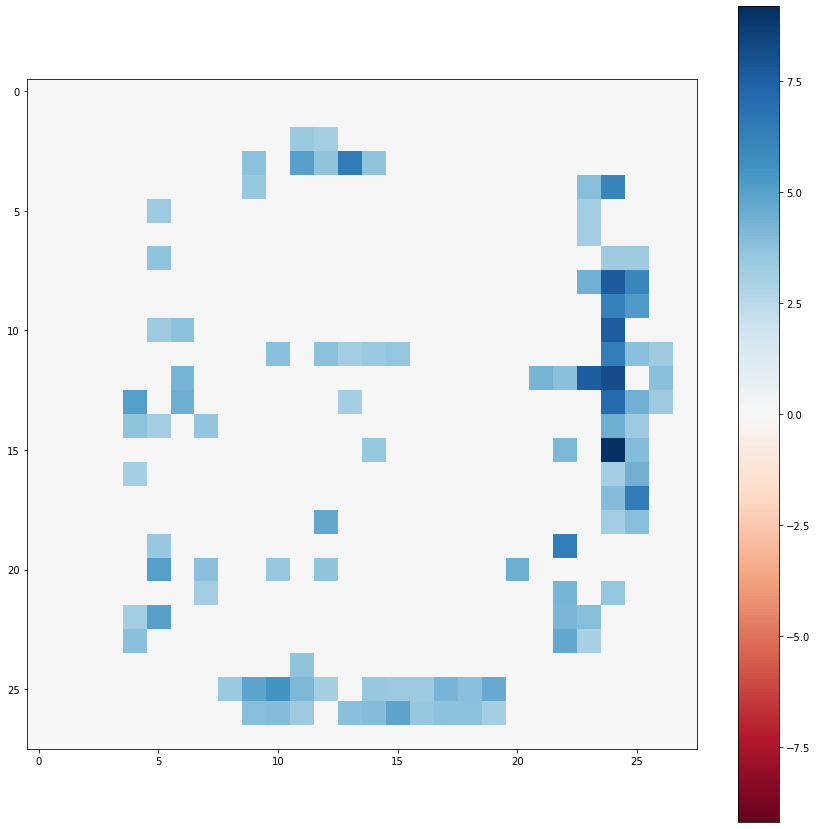

In [87]:
lasso_all_digit_rank = abs(lasso_coefs_copy).sum(axis=0)

lasso_all_digit_copy = lasso_all_digit_rank.copy()
lasso_all_digit_copy.sort()
thresh = lasso_all_digit_copy[-n]
filter = lasso_all_digit_rank < thresh
lasso_all_digit_rank[filter] = 0

scale = np.abs(lasso_all_digit_rank).max()

fig, ax = plt.subplots(figsize=(15, 15), ncols=1)

im = ax.imshow(lasso_all_digit_rank.reshape(28,28), interpolation='nearest',
               vmin=-scale, vmax=scale, cmap=plt.cm.RdBu)

fig.colorbar(im, ax=ax)


### Ridge

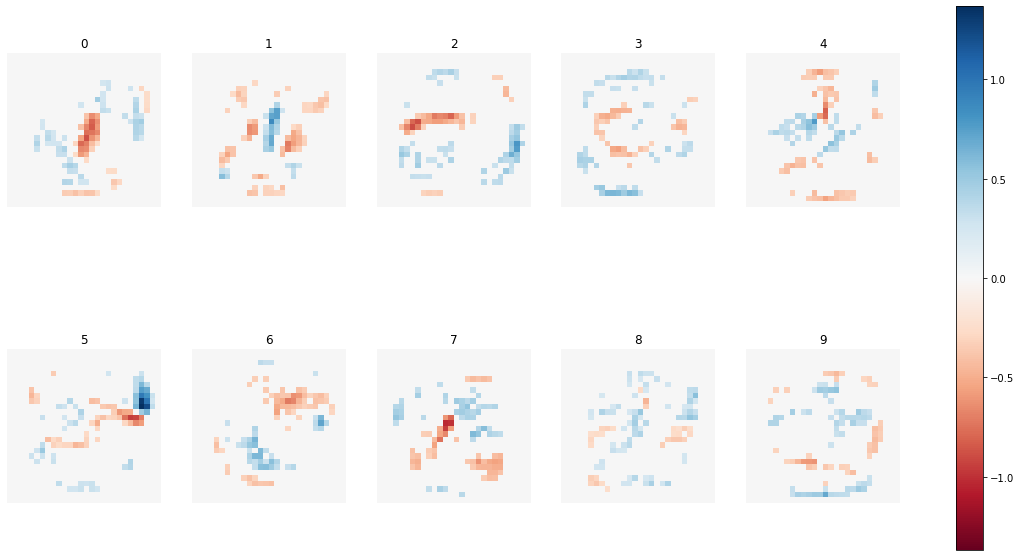

In [ ]:
n = 100

ridge_coefs_copy = ridge_coefs.copy()

arr = np.empty((0,784), float)
for row in ridge_coefs_copy:
  abs_row = abs(row)
  abs_row.sort()
  thresh = abs_row[-n]
  filter = abs(row) < thresh
  row[filter] = 0
  arr = np.append(arr, np.array([row]), axis=0)


fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

scale = np.abs(ridge_coefs).max()

for i, ax in enumerate(axes.flat):
  ax.set_axis_off()
  ax.set_title(f"{i}")
  img = arr[i]
  img = img.reshape(28,28)
  im = ax.imshow(img, interpolation='nearest', vmin=-scale, vmax=scale, cmap=plt.cm.RdBu)

cbar = fig.colorbar(im, ax=axes.ravel().tolist())

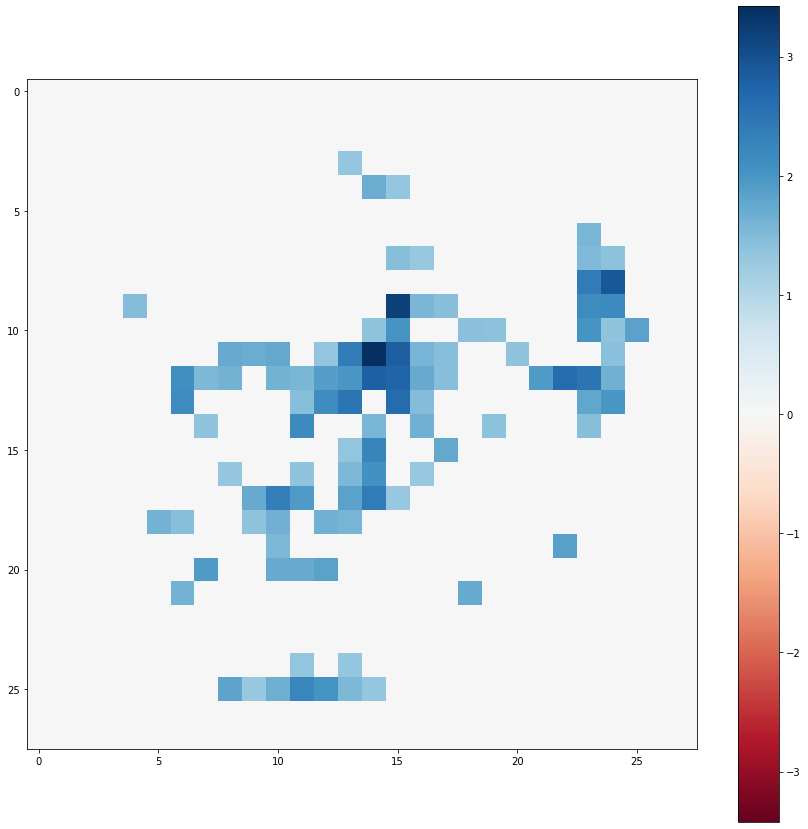

In [88]:
ridge_all_digit_rank = abs(ridge_coefs_copy).sum(axis=0)

ridge_all_digit_copy = ridge_all_digit_rank.copy()
ridge_all_digit_copy.sort()
thresh = ridge_all_digit_copy[-n]
filter = ridge_all_digit_rank < thresh
ridge_all_digit_rank[filter] = 0

scale = np.abs(ridge_all_digit_rank).max()

fig, ax = plt.subplots(figsize=(15, 15), ncols=1)

im = ax.imshow(ridge_all_digit_rank.reshape(28,28), interpolation='nearest',
               vmin=-scale, vmax=scale, cmap=plt.cm.RdBu)

fig.colorbar(im, ax=ax)


## Elastic Net

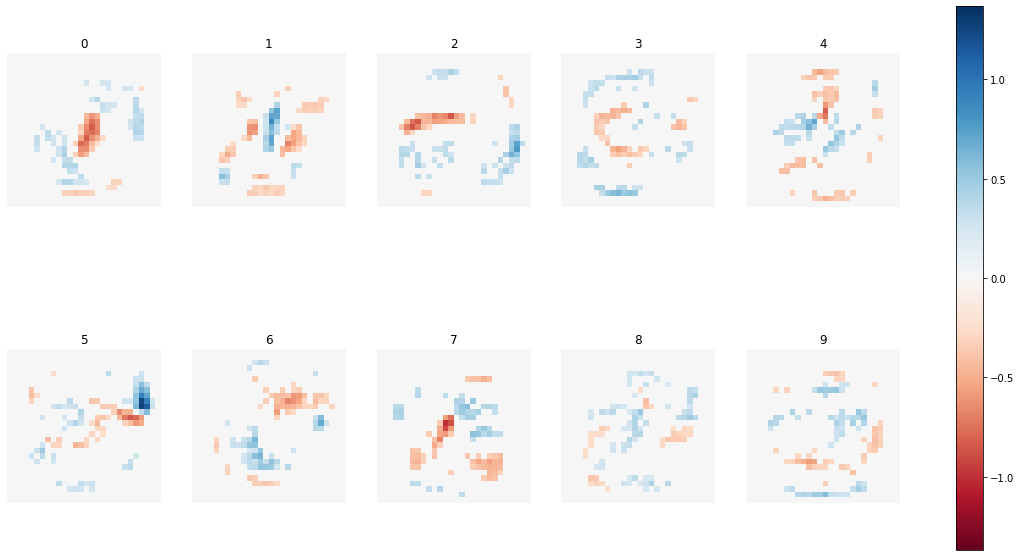

In [ ]:
n = 100

en_coefs_copy = clf.best_estimator_.coef_.copy()

arr = np.empty((0,784), float)
for row in en_coefs_copy:
  abs_row = abs(row)
  abs_row.sort()
  thresh = abs_row[-n]
  filter = abs(row) < thresh
  row[filter] = 0
  arr = np.append(arr, np.array([row]), axis=0)


fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

scale = np.abs(ridge_coefs).max()

for i, ax in enumerate(axes.flat):
  ax.set_axis_off()
  ax.set_title(f"{i}")
  img = arr[i]
  img = img.reshape(28,28)
  im = ax.imshow(img, interpolation='nearest', vmin=-scale, vmax=scale, cmap=plt.cm.RdBu)

cbar = fig.colorbar(im, ax=axes.ravel().tolist())

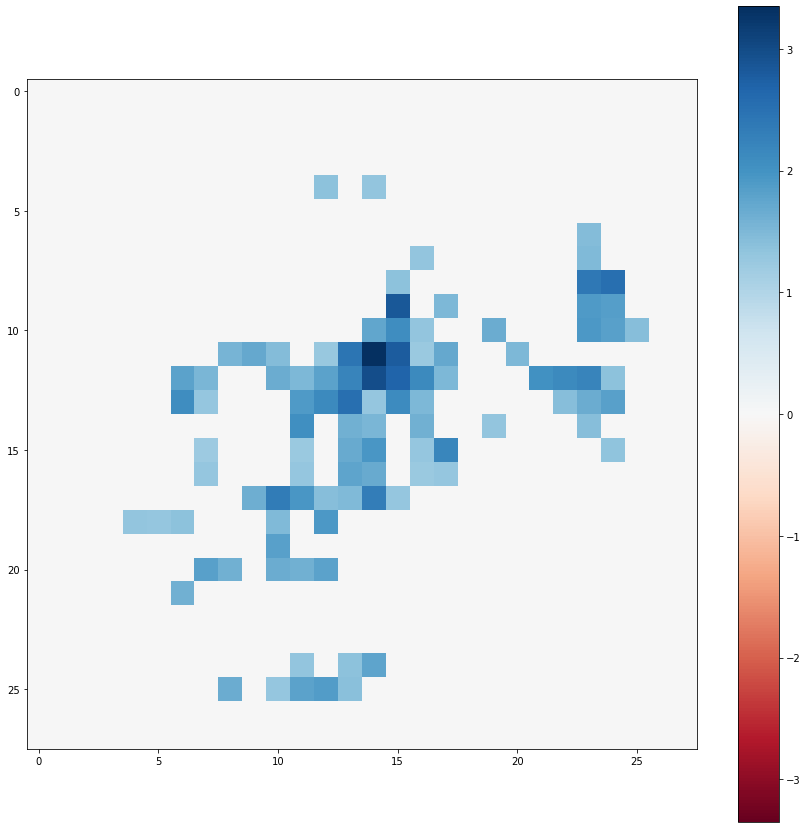

In [89]:
en_all_digit_rank = abs(en_coefs_copy).sum(axis=0)

en_all_digit_copy = en_all_digit_rank.copy()
en_all_digit_copy.sort()
thresh = en_all_digit_copy[-n]
filter = en_all_digit_rank < thresh
en_all_digit_rank[filter] = 0

scale = np.abs(en_all_digit_rank).max()

fig, ax = plt.subplots(figsize=(15, 15), ncols=1)

im = ax.imshow(en_all_digit_rank.reshape(28,28), interpolation='nearest',
               vmin=-scale, vmax=scale, cmap=plt.cm.RdBu)

fig.colorbar(im, ax=ax)


# Test set

### LASSO

In [ ]:
yhat =clf_lasso.predict(x_test)

print(f"Test accuracy {accuracy_score(y_test, yhat)*100}%")
confusion_matrix(y_test, yhat)

Test accuracy 92.62%


array([[ 957,    0,    1,    4,    1,    9,    4,    3,    1,    0],
       [   0, 1112,    5,    1,    0,    2,    3,    1,   11,    0],
       [   6,    9,  931,   16,   10,    3,   12,   10,   31,    4],
       [   4,    1,   17,  926,    1,   23,    2,   10,   18,    8],
       [   1,    3,    8,    3,  920,    0,    5,    7,    6,   29],
       [   9,    3,    3,   35,    8,  778,   15,    6,   31,    4],
       [   8,    3,    7,    2,    6,   16,  913,    2,    1,    0],
       [   1,    7,   24,    7,    5,    1,    0,  948,    3,   32],
       [  10,   11,    6,   22,    7,   27,   13,   11,  855,   12],
       [   9,    7,    1,    9,   23,    7,    0,   22,    9,  922]])

In [67]:
print(classification_report(y_test, yhat, target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], digits=3))

              precision    recall  f1-score   support

           0      0.952     0.977     0.964       980
           1      0.962     0.980     0.971      1135
           2      0.928     0.902     0.915      1032
           3      0.903     0.917     0.910      1010
           4      0.938     0.937     0.937       982
           5      0.898     0.872     0.885       892
           6      0.944     0.953     0.949       958
           7      0.929     0.922     0.926      1028
           8      0.885     0.878     0.881       974
           9      0.912     0.914     0.913      1009

    accuracy                          0.926     10000
   macro avg      0.925     0.925     0.925     10000
weighted avg      0.926     0.926     0.926     10000



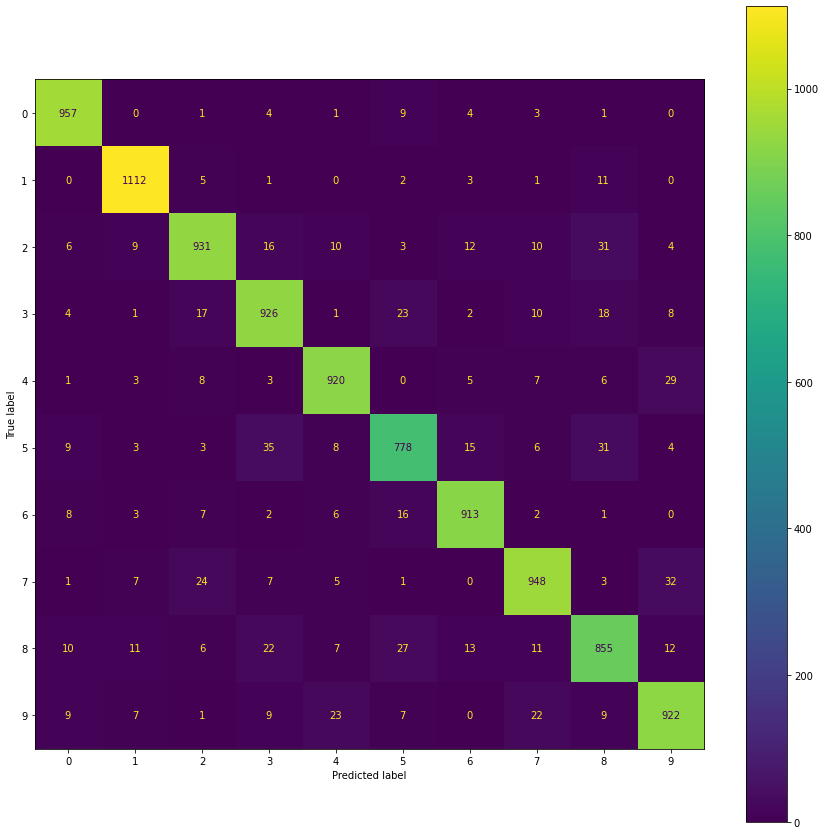

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))


plot_confusion_matrix(clf_lasso, x_test, y_test, ax=ax, values_format='.4g') 

### Ridge

In [ ]:
confusion_matrix(y_test, clf_ridge.predict(x_test))

print(f"Test accuracy {accuracy_score(y_test, clf_ridge.predict(x_test))*100}%")


Test accuracy 92.54%


In [64]:
print(classification_report(y_test,  clf_ridge.predict(x_test), target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], digits=3))

              precision    recall  f1-score   support

           0      0.954     0.980     0.967       980
           1      0.965     0.979     0.972      1135
           2      0.933     0.902     0.917      1032
           3      0.906     0.912     0.909      1010
           4      0.926     0.935     0.931       982
           5      0.905     0.869     0.887       892
           6      0.937     0.948     0.942       958
           7      0.930     0.924     0.927      1028
           8      0.878     0.890     0.884       974
           9      0.910     0.905     0.908      1009

    accuracy                          0.925     10000
   macro avg      0.924     0.924     0.924     10000
weighted avg      0.925     0.925     0.925     10000



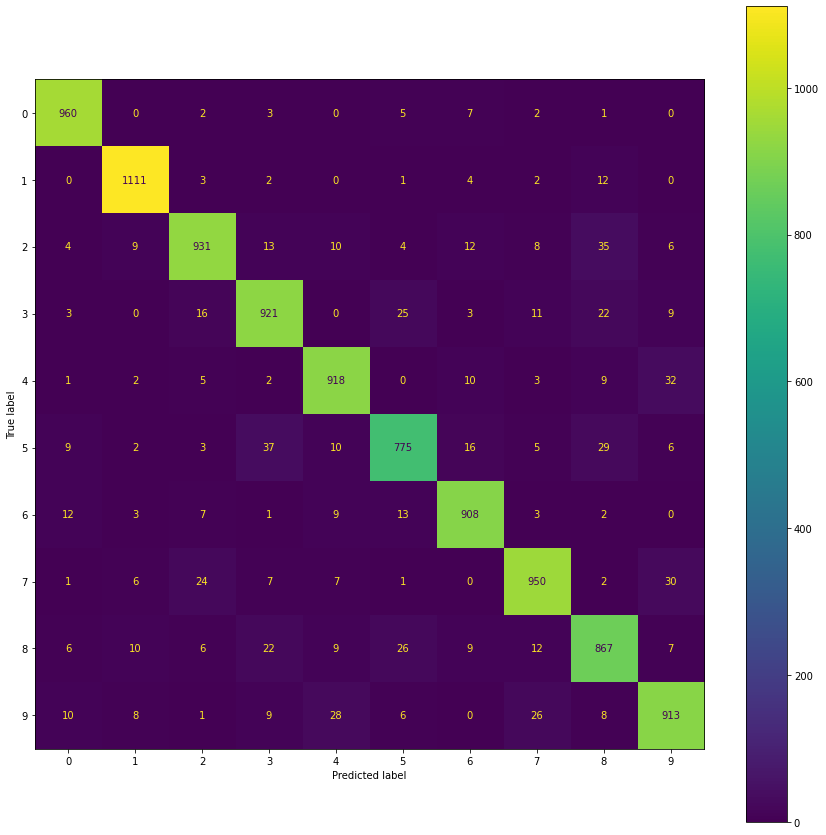

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

plot_confusion_matrix(clf_ridge, x_test, y_test, ax=ax, values_format = '.4g') 

### Elastic Net

In [ ]:
confusion_matrix(y_test, clf.best_estimator_.predict(x_test))

print(f"Test accuracy {accuracy_score(y_test, clf.best_estimator_.predict(x_test))*100}%")


Test accuracy 92.52%


In [68]:
print(classification_report(y_test, clf.best_estimator_.predict(x_test), target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], digits=3))

              precision    recall  f1-score   support

           0      0.953     0.979     0.966       980
           1      0.965     0.979     0.972      1135
           2      0.929     0.895     0.912      1032
           3      0.909     0.911     0.910      1010
           4      0.928     0.934     0.931       982
           5      0.909     0.870     0.889       892
           6      0.934     0.952     0.943       958
           7      0.928     0.923     0.925      1028
           8      0.874     0.893     0.884       974
           9      0.914     0.906     0.910      1009

    accuracy                          0.925     10000
   macro avg      0.924     0.924     0.924     10000
weighted avg      0.925     0.925     0.925     10000



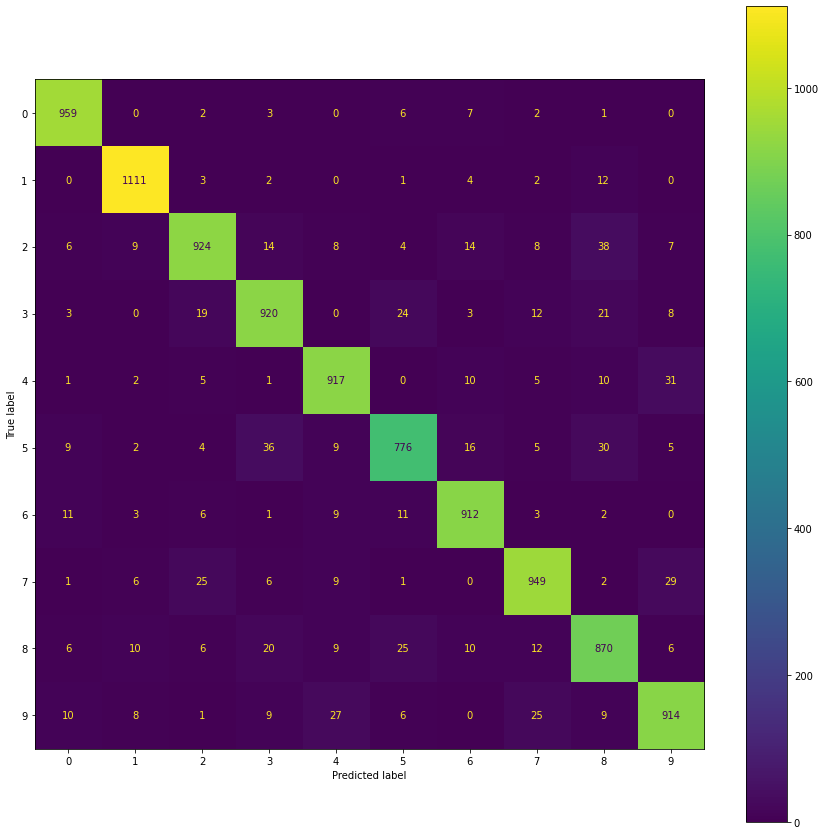

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

plot_confusion_matrix(clf.best_estimator_, x_test, y_test, ax=ax, values_format = '.4g')

## Sparse Test Evaluation
Using the top 100 pixels from each model we evaluate on the test set.

### LASSO

In [96]:
lasso_sparse_subset = lasso_all_digit_rank.nonzero()

In [99]:
lasso_sparse_subset

(array([ 67,  68,  93,  95,  96,  97,  98, 121, 135, 136, 145, 163, 191,
        201, 220, 221, 247, 248, 249, 276, 277, 285, 286, 304, 318, 320,
        321, 322, 323, 332, 333, 334, 342, 357, 358, 359, 360, 362, 368,
        370, 377, 388, 389, 390, 396, 397, 399, 416, 417, 434, 442, 444,
        445, 452, 472, 473, 500, 501, 516, 528, 529, 537, 554, 565, 567,
        570, 572, 580, 595, 610, 612, 620, 621, 638, 639, 648, 666, 667,
        683, 708, 709, 710, 711, 712, 714, 715, 716, 717, 718, 719, 737,
        738, 739, 741, 742, 743, 744, 745, 746, 747]),)

In [113]:
# subset training and test sets to top 100 pixels
x_train_sparse_lasso = np.transpose(np.transpose(x_train)[lasso_sparse_subset])
x_test_sparse_lasso = np.transpose(np.transpose(x_test)[lasso_sparse_subset])

In [114]:
clf_lasso_sparse = LogisticRegression(C= 100, penalty='l1', solver='saga', tol=0.1)
clf_lasso_sparse.fit(x_train_sparse_lasso, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.1, verbose=0,
                   warm_start=False)

In [117]:
yhat =clf_lasso_sparse.predict(x_test_sparse_lasso)
print(f"Test accuracy {accuracy_score(y_test, yhat)*100}%")
print(classification_report(
    y_test, yhat,
    target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
    digits=3)
)

Test accuracy 79.7%
              precision    recall  f1-score   support

           0      0.882     0.926     0.903       980
           1      0.862     0.949     0.904      1135
           2      0.871     0.829     0.850      1032
           3      0.733     0.778     0.755      1010
           4      0.705     0.756     0.730       982
           5      0.745     0.629     0.682       892
           6      0.800     0.841     0.820       958
           7      0.840     0.841     0.841      1028
           8      0.748     0.630     0.684       974
           9      0.754     0.749     0.751      1009

    accuracy                          0.797     10000
   macro avg      0.794     0.793     0.792     10000
weighted avg      0.796     0.797     0.795     10000



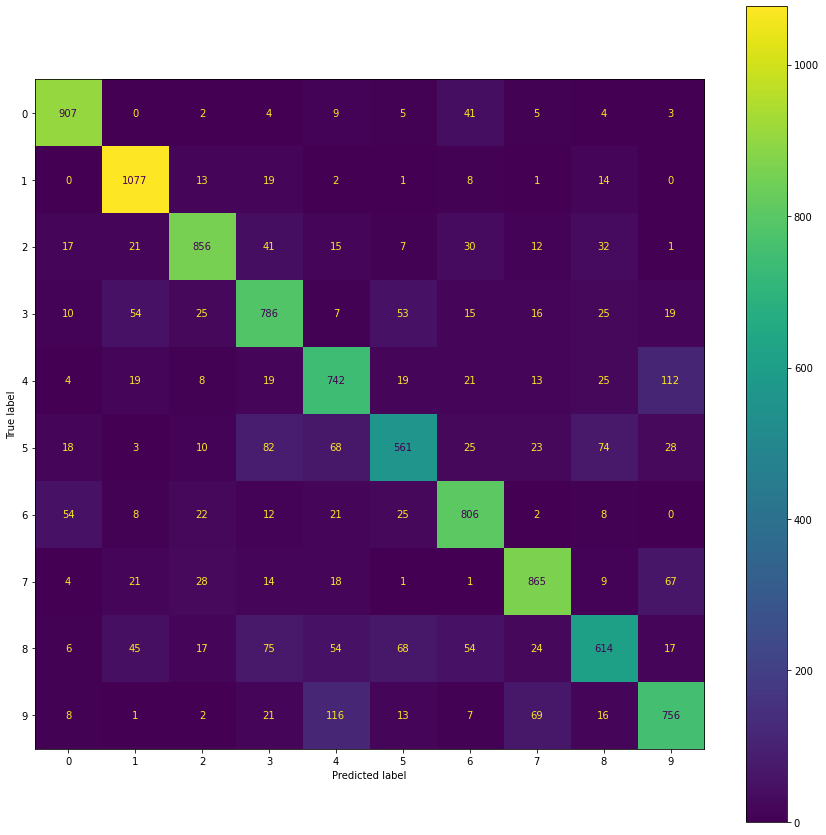

In [118]:
fig, ax = plt.subplots(figsize=(15, 15))

plot_confusion_matrix(clf_lasso_sparse, x_test_sparse_lasso, y_test, ax=ax, values_format = '.4g') 

### Ridge

In [119]:
ridge_sparse_subset = ridge_all_digit_rank.nonzero()

In [120]:
# subset training and test sets to top 100 pixels
x_train_sparse_ridge = np.transpose(np.transpose(x_train)[ridge_sparse_subset])
x_test_sparse_ridge = np.transpose(np.transpose(x_test)[ridge_sparse_subset])

In [121]:
clf_ridge_sparse = LogisticRegression(C= 10000, penalty='l2', solver='saga', tol=0.1)
clf_ridge_sparse.fit(x_train_sparse_ridge, y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.1, verbose=0,
                   warm_start=False)

In [123]:
yhat =clf_ridge_sparse.predict(x_test_sparse_ridge)
print(f"Test accuracy {accuracy_score(y_test, yhat)*100}%")
print(classification_report(
    y_test, yhat,
    target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
    digits=3)
)

Test accuracy 88.31%
              precision    recall  f1-score   support

           0      0.929     0.974     0.951       980
           1      0.937     0.963     0.950      1135
           2      0.910     0.869     0.889      1032
           3      0.865     0.879     0.872      1010
           4      0.856     0.853     0.855       982
           5      0.865     0.825     0.845       892
           6      0.878     0.898     0.888       958
           7      0.892     0.898     0.895      1028
           8      0.864     0.811     0.837       974
           9      0.824     0.843     0.833      1009

    accuracy                          0.883     10000
   macro avg      0.882     0.881     0.881     10000
weighted avg      0.883     0.883     0.883     10000



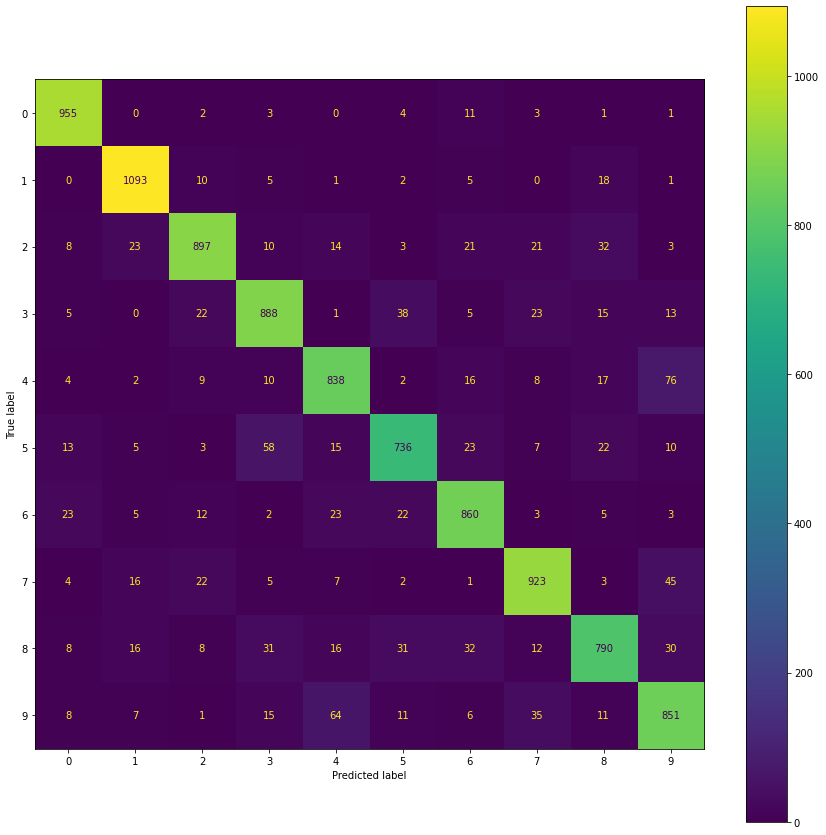

In [124]:
fig, ax = plt.subplots(figsize=(15, 15))

plot_confusion_matrix(clf_ridge_sparse, x_test_sparse_ridge, y_test, ax=ax, values_format = '.4g') 

### Elastic Net

In [125]:
en_sparse_subset = en_all_digit_rank.nonzero()

In [126]:
# subset training and test sets to top 100 pixels
x_train_sparse_en = np.transpose(np.transpose(x_train)[en_sparse_subset])
x_test_sparse_en = np.transpose(np.transpose(x_test)[en_sparse_subset])

In [127]:
clf.best_params_

{'C': 100, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}

In [129]:
clf_en_sparse = LogisticRegression(C= 100, penalty='elasticnet', l1_ratio=0.8, solver='saga', tol=0.1)
clf_en_sparse.fit(x_train_sparse_en, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.8, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.1, verbose=0,
                   warm_start=False)

In [130]:
yhat =clf_en_sparse.predict(x_test_sparse_en)
print(f"Test accuracy {accuracy_score(y_test, yhat)*100}%")
print(classification_report(
    y_test, yhat,
    target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
    digits=3)
)

Test accuracy 87.46000000000001%
              precision    recall  f1-score   support

           0      0.932     0.971     0.951       980
           1      0.927     0.969     0.947      1135
           2      0.896     0.840     0.867      1032
           3      0.875     0.857     0.866      1010
           4      0.836     0.838     0.837       982
           5      0.853     0.835     0.844       892
           6      0.885     0.887     0.886       958
           7      0.880     0.894     0.887      1028
           8      0.849     0.813     0.831       974
           9      0.802     0.825     0.813      1009

    accuracy                          0.875     10000
   macro avg      0.873     0.873     0.873     10000
weighted avg      0.874     0.875     0.874     10000



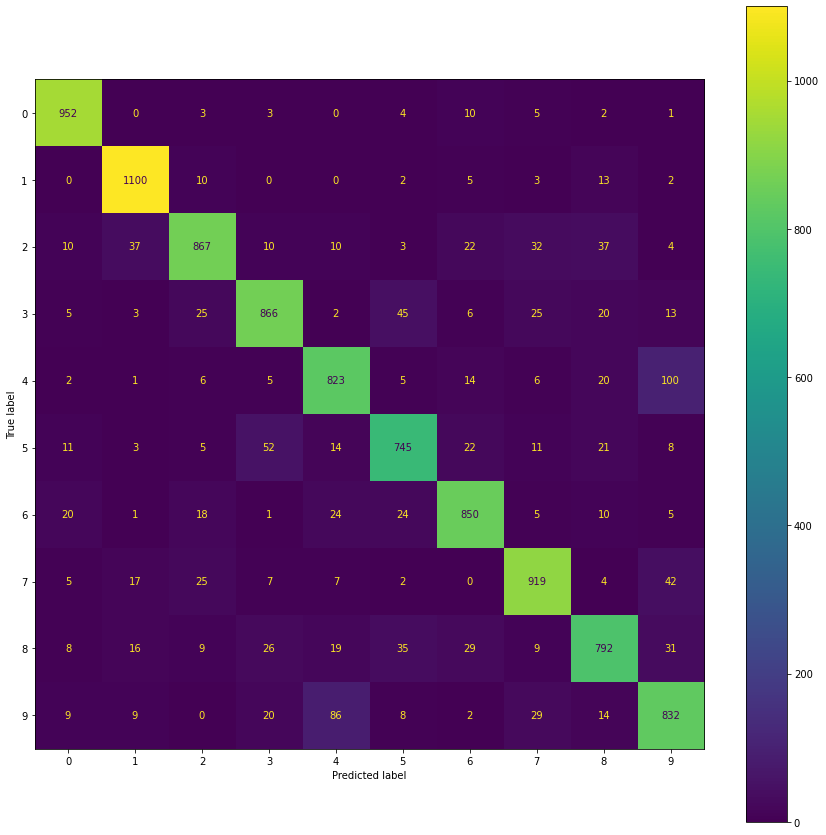

In [131]:
fig, ax = plt.subplots(figsize=(15, 15))

plot_confusion_matrix(clf_en_sparse, x_test_sparse_en, y_test, ax=ax, values_format = '.4g') 